<a href="https://colab.research.google.com/github/NileshCT/Machine_Learning_Models/blob/main/Ridge_and_Lasso_Vs_Elastic(Regularization)_On_Boston_house_Housedata_Dataset_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Implimentation of Lesso and Ridge regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Importing the boston house dataset from sklearn dataset
#Loading the pre_defined dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

print(boston_dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [4]:
boston=pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)

In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#adding target variable in the boston dataset
boston["MEDV"]=boston_dataset.target

In [7]:
df=boston.copy()

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [12]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
df.shape

(506, 14)

In [16]:
import seaborn as sns

<ipython-input-17-41419941fe11>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["MEDV"],bins=10)


<Axes: ylabel='Density'>

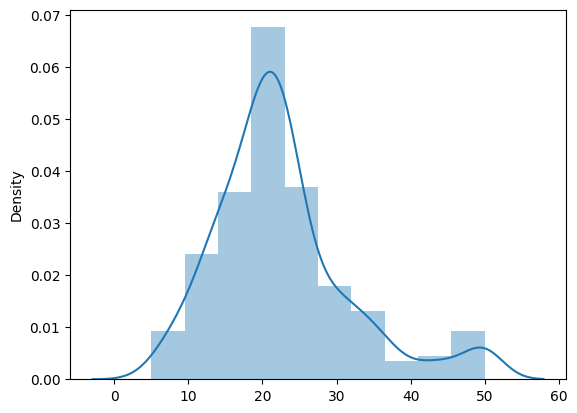

In [17]:
#Distplot
sns.distplot(x=df["MEDV"],bins=10)

In [18]:
numeric_feature=df.describe().columns
numeric_feature

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

<ipython-input-19-8d7e28fc922d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["LSTAT"],bins=10)


<Axes: xlabel='LSTAT', ylabel='Density'>

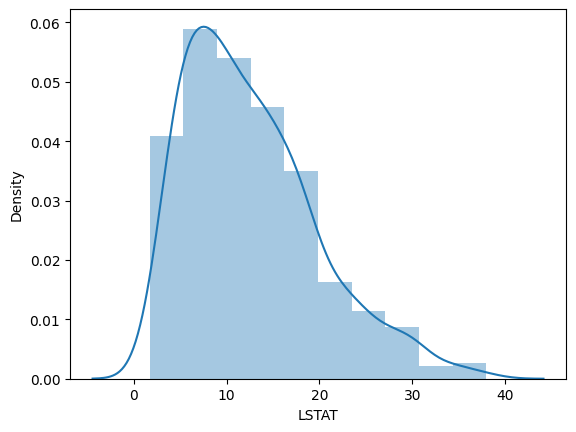

In [19]:
sns.distplot(df["LSTAT"],bins=10)

<ipython-input-20-b46c62676773>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["B"],bins=10)


<Axes: xlabel='B', ylabel='Density'>

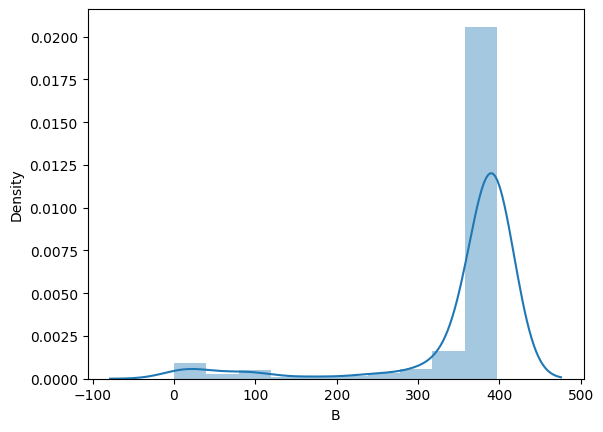

In [20]:
sns.distplot(df["B"],bins=10)

<ipython-input-21-14b34efd18ec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["PTRATIO"],bins=10)


<Axes: xlabel='PTRATIO', ylabel='Density'>

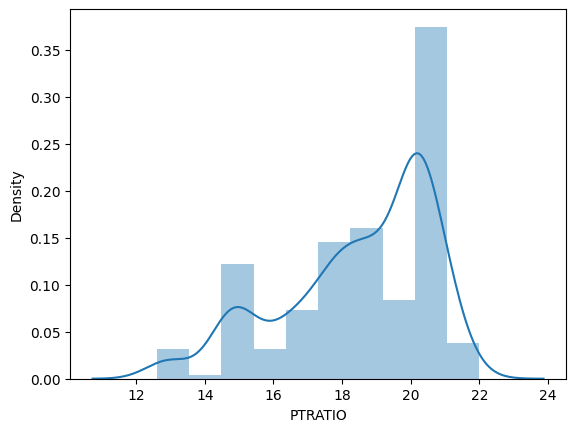

In [21]:
sns.distplot(df["PTRATIO"],bins=10)

<ipython-input-22-b93f057d45c2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TAX"],bins=10)


<Axes: xlabel='TAX', ylabel='Density'>

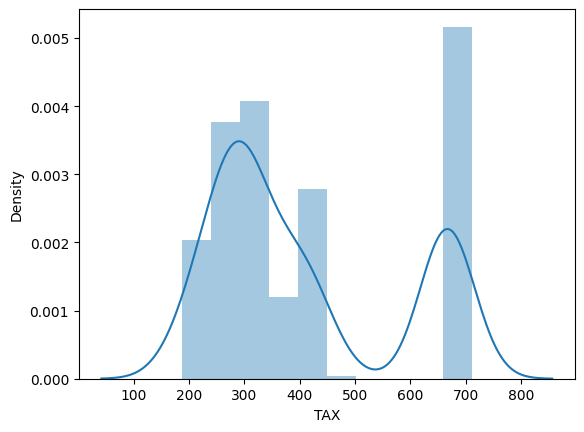

In [22]:
sns.distplot(df["TAX"],bins=10)

<ipython-input-23-77c5e90639e1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["RAD"],bins=10)


<Axes: xlabel='RAD', ylabel='Density'>

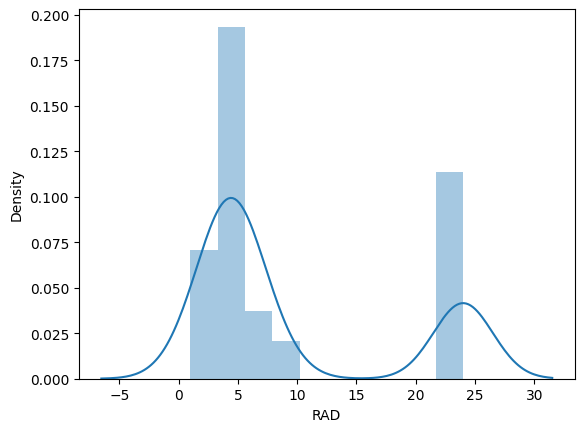

In [23]:
sns.distplot(df["RAD"],bins=10)

<ipython-input-24-bf3d8973ea3c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["DIS"],bins=10)


<Axes: xlabel='DIS', ylabel='Density'>

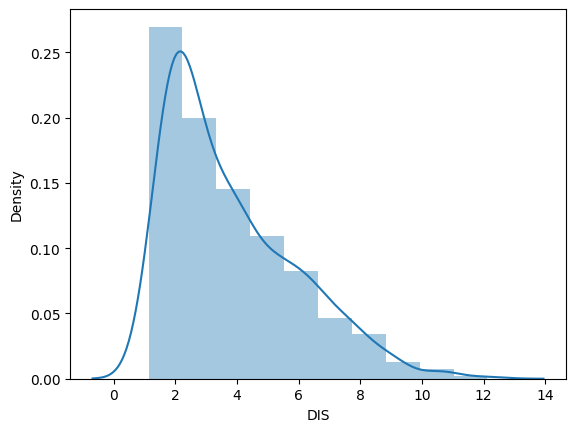

In [24]:
sns.distplot(df["DIS"],bins=10)

<ipython-input-25-ec265b99b20e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["AGE"],bins=10)


<Axes: xlabel='AGE', ylabel='Density'>

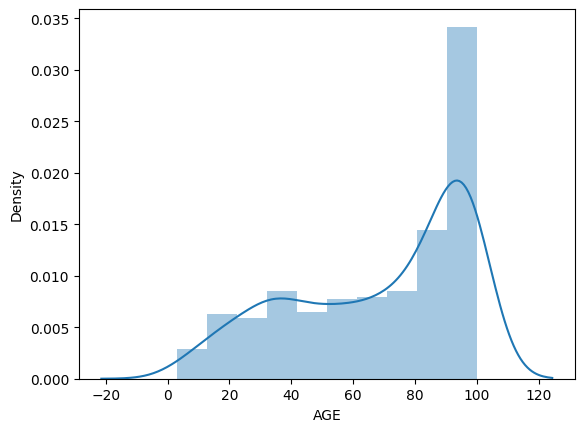

In [25]:
sns.distplot(df["AGE"],bins=10)

<ipython-input-26-03c629d24e66>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["RM"],bins=10)


<Axes: xlabel='RM', ylabel='Density'>

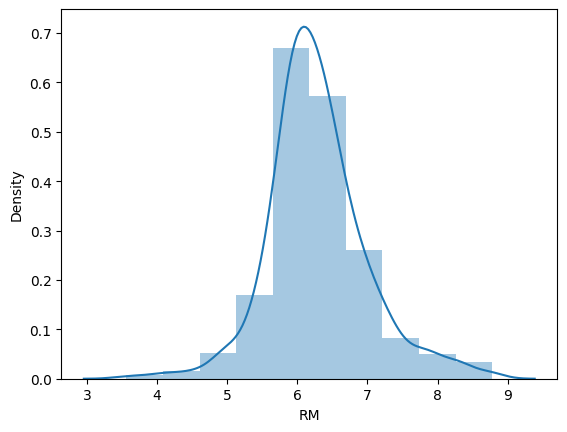

In [26]:
sns.distplot(df["RM"],bins=10)

<ipython-input-27-1fdff916cb5b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["NOX"],bins=10)


<Axes: xlabel='NOX', ylabel='Density'>

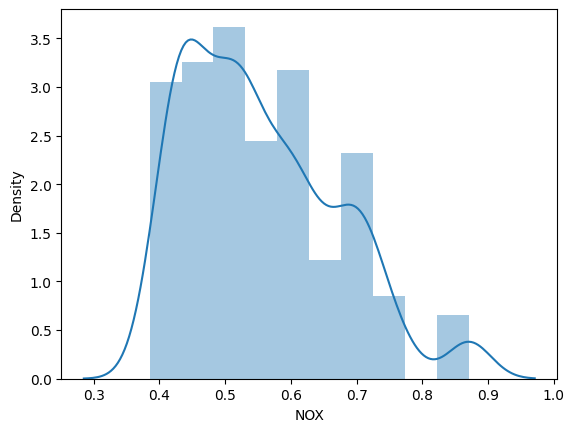

In [27]:
sns.distplot(df["NOX"],bins=10)

<ipython-input-28-955a6d8ff18d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CHAS"],bins=10)


<Axes: xlabel='CHAS', ylabel='Density'>

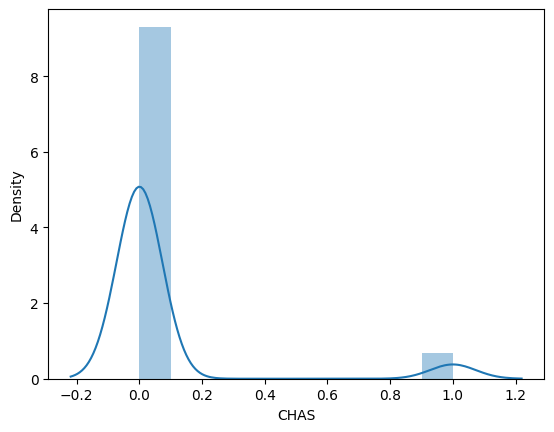

In [28]:
sns.distplot(df["CHAS"],bins=10)

<ipython-input-29-c8cb043e41f5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["INDUS"],bins=10)


<Axes: ylabel='Density'>

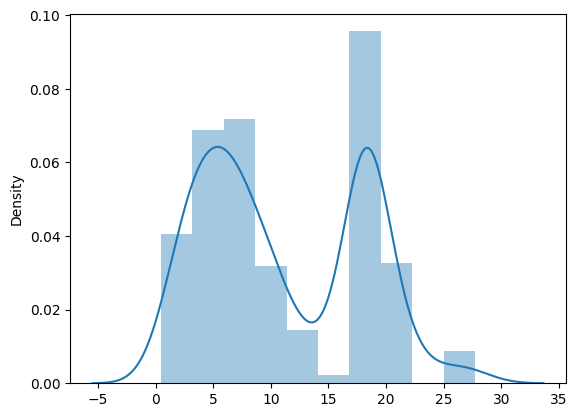

In [29]:
sns.distplot(x=df["INDUS"],bins=10)

<ipython-input-30-b34e3d630248>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["ZN"],bins=10)


<Axes: ylabel='Density'>

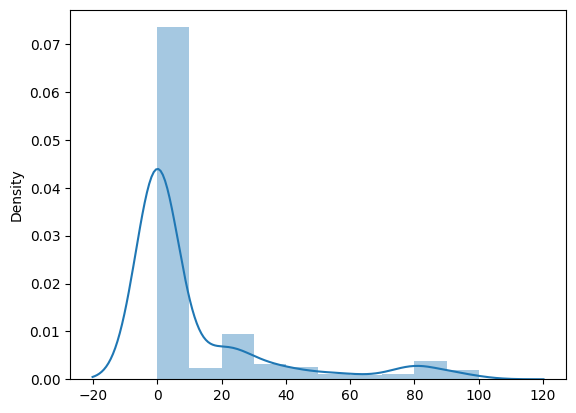

In [30]:
sns.distplot(x=df["ZN"],bins=10)

<ipython-input-31-702dfd176150>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["CRIM"],bins=10)


<Axes: ylabel='Density'>

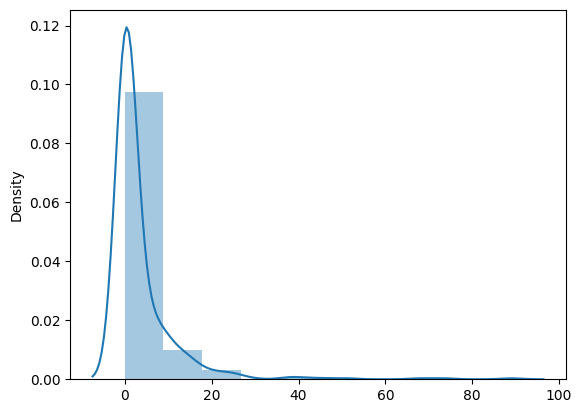

In [31]:
sns.distplot(x=df["CRIM"],bins=10)

CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'
       

**3]Rugplot**

<Axes: >

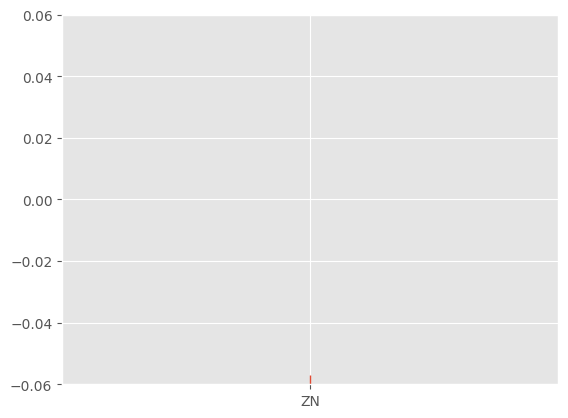

In [84]:
sns.rugplot(x=["ZN"])

<Axes: xlabel='CRIM'>

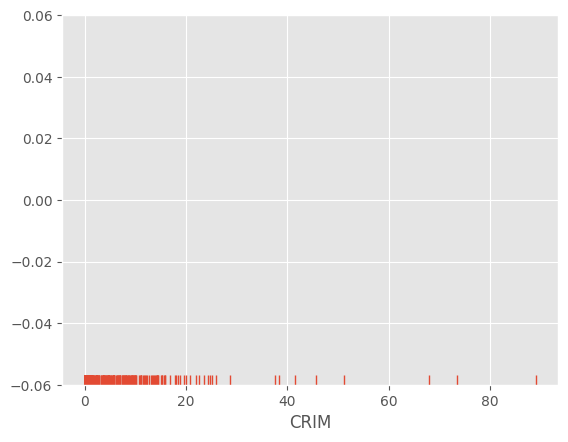

In [83]:
sns.rugplot(x=df["CRIM"])

**2]Jointplot**

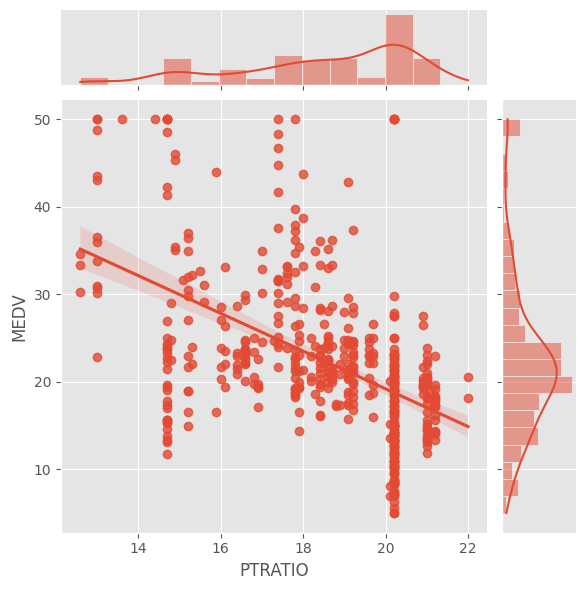

In [82]:
sns.jointplot(x=df["PTRATIO"],y=df["MEDV"],kind="reg")

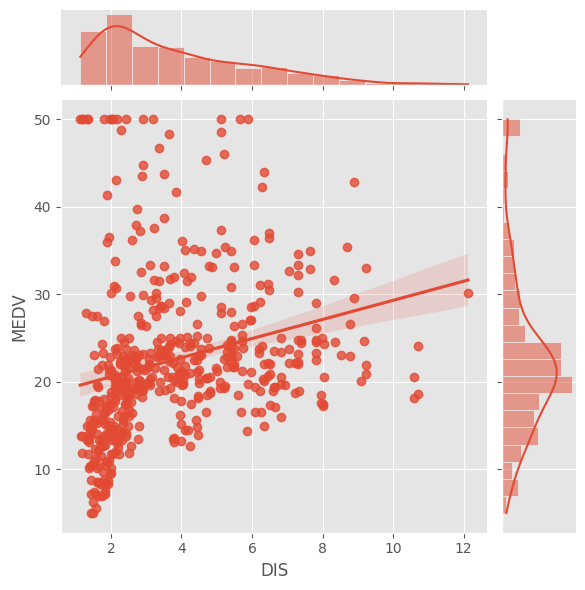

In [81]:
sns.jointplot(x=df["DIS"],y=df["MEDV"],kind="reg")

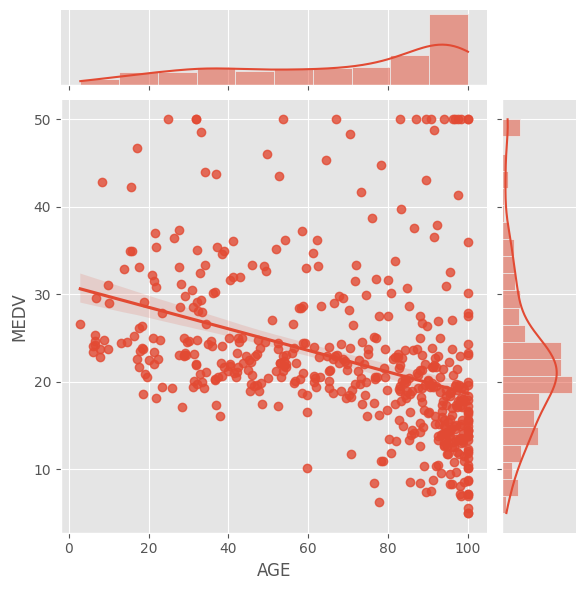

In [80]:
sns.jointplot(x=df["AGE"],y=df["MEDV"],kind="reg")

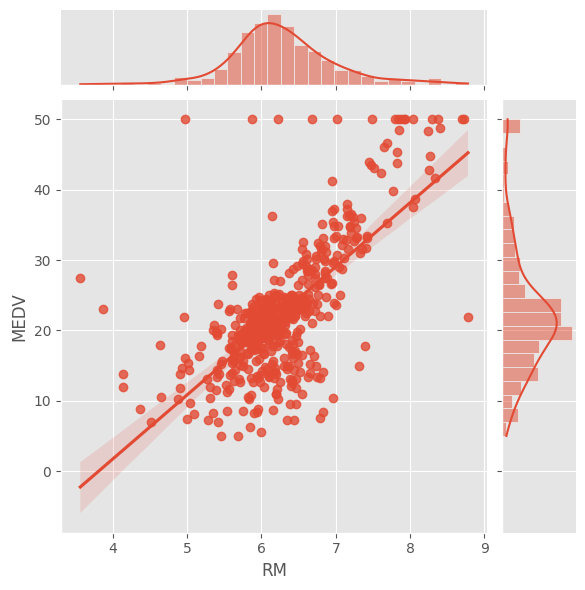

In [79]:
sns.jointplot(x=df["RM"],y=df["MEDV"],kind="reg")

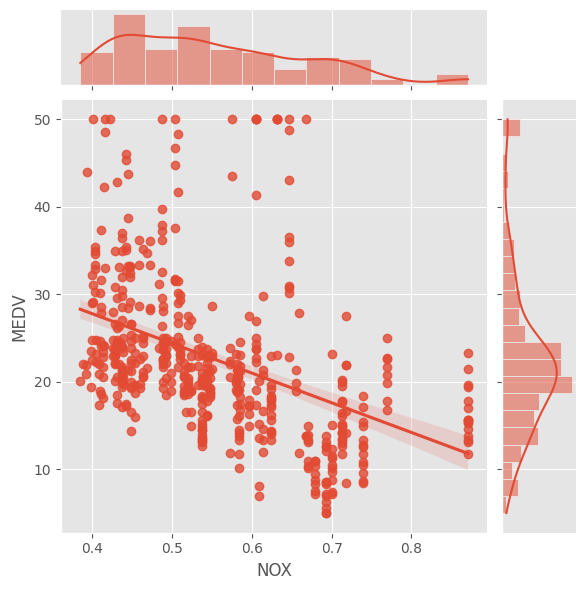

In [78]:
sns.jointplot(x=df["NOX"],y=df["MEDV"],kind="reg")

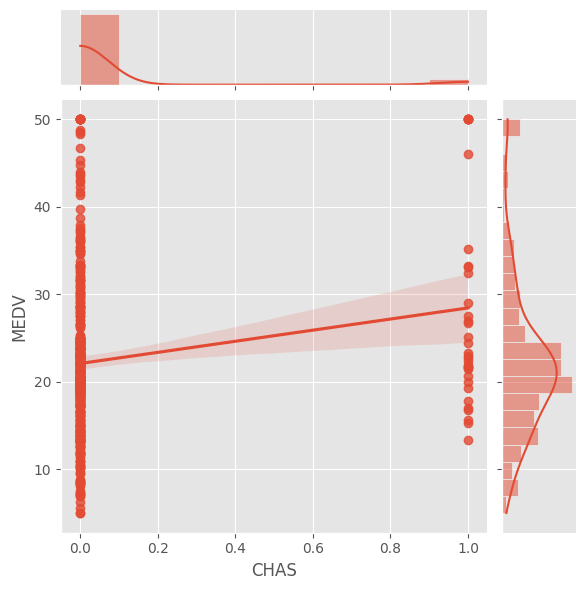

In [77]:
sns.jointplot(x=df["CHAS"],y=df["MEDV"],kind="reg")

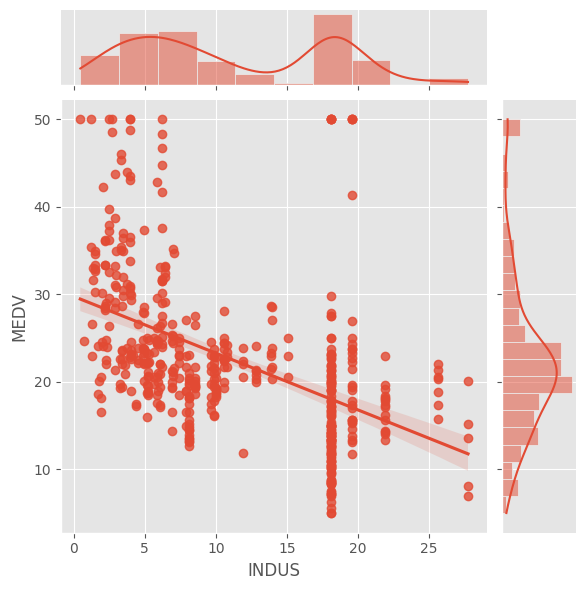

In [76]:
sns.jointplot(x=df["INDUS"],y=df["MEDV"],kind="reg")

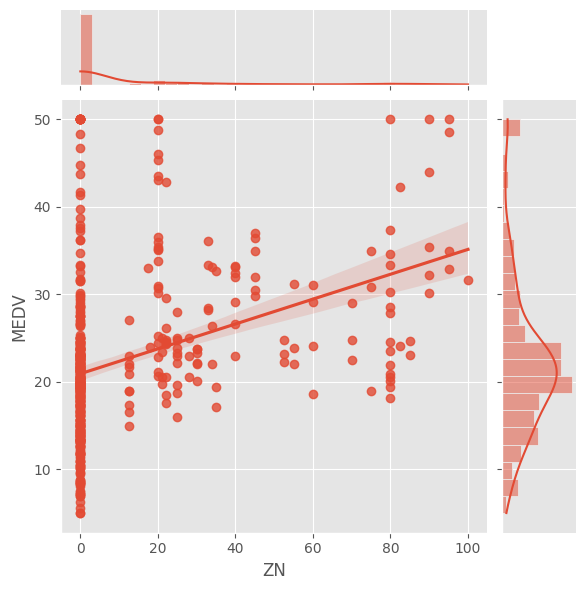

In [75]:
sns.jointplot(x=df["ZN"],y=df["MEDV"],kind="reg")

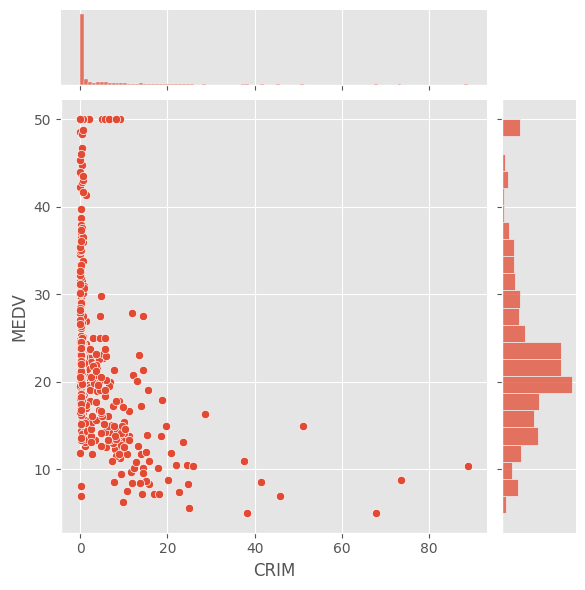

In [72]:
sns.jointplot(x=df["CRIM"],y=df["MEDV"],kind="scatter")

<function matplotlib.pyplot.show(close=None, block=None)>

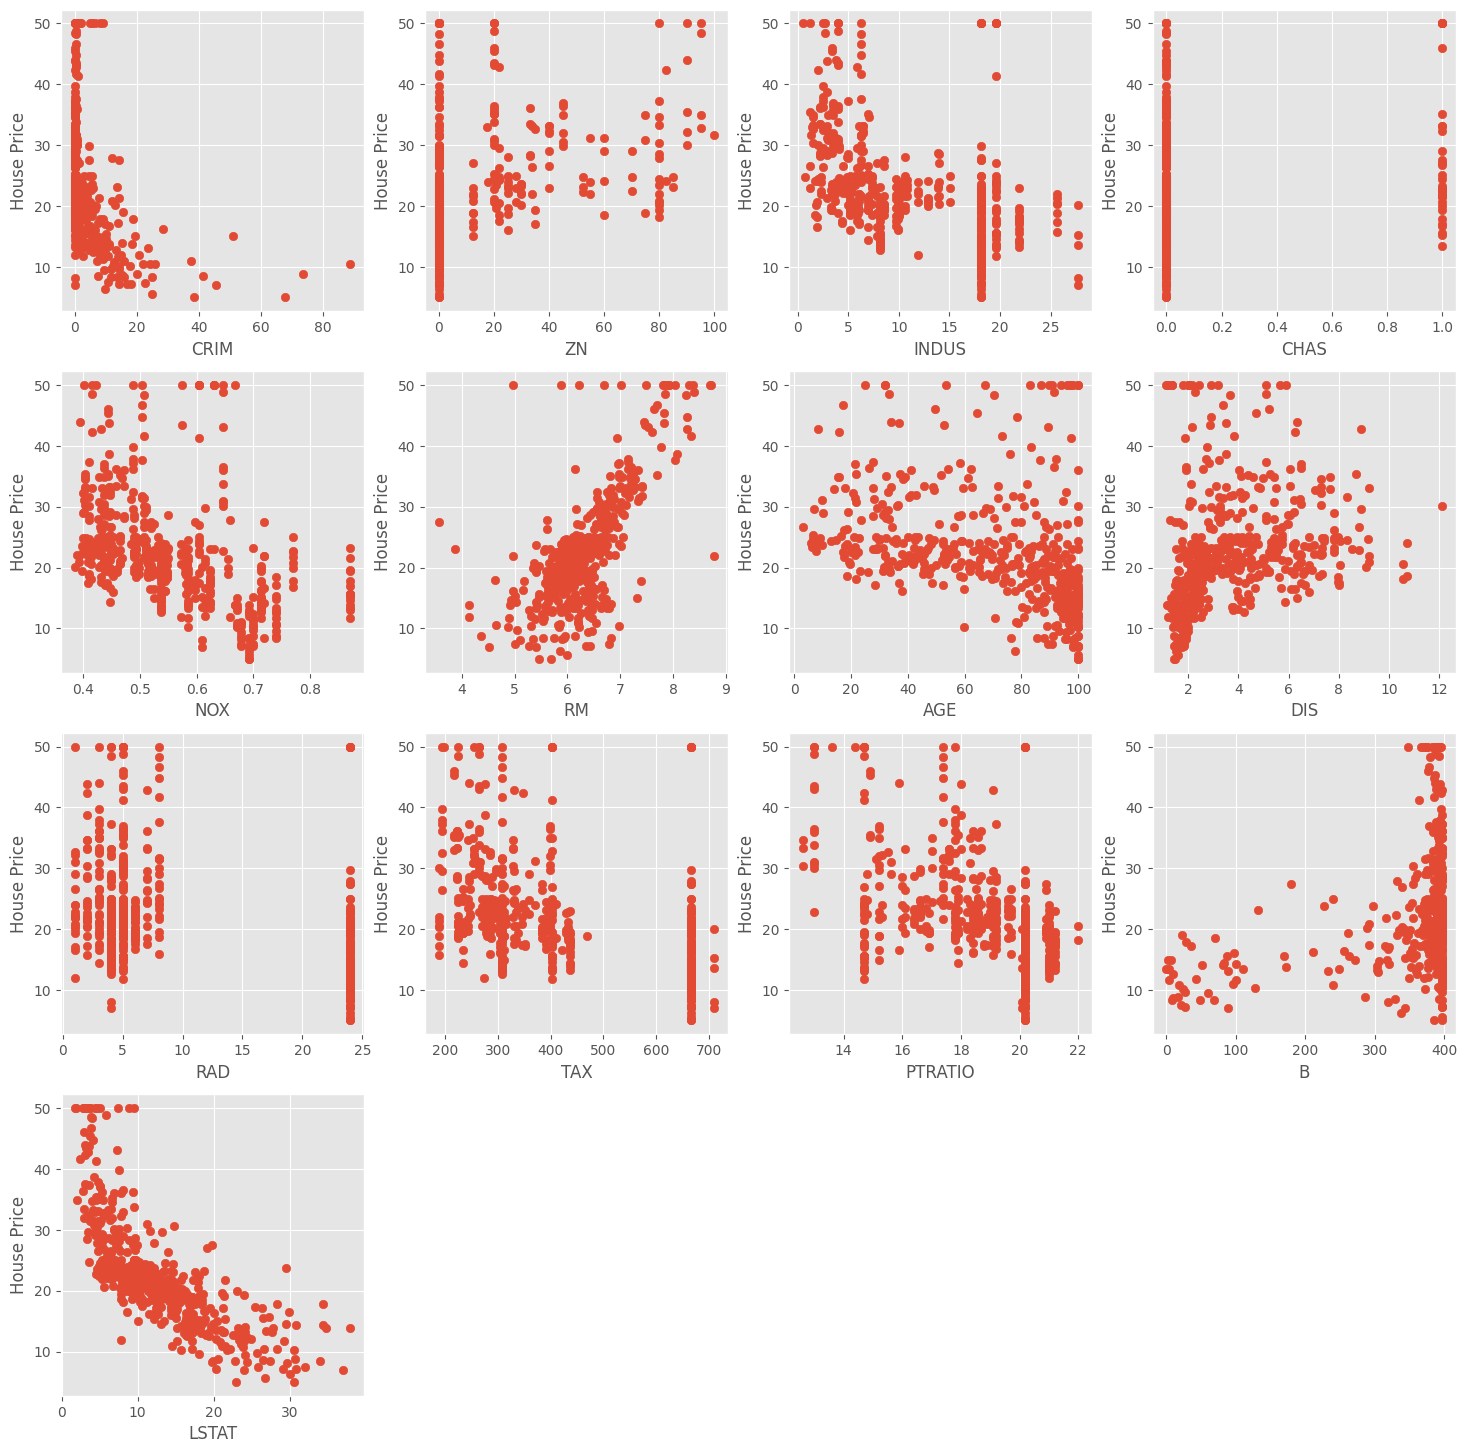

In [32]:
plt.style.use("ggplot")
fig=plt.figure(figsize=(18,18))

for index,feature_name in enumerate(boston_dataset.feature_names):
  ax=fig.add_subplot(4,4,index+1)
  ax.scatter(boston_dataset.data[:,index],boston_dataset.target)
  ax.set_ylabel("House Price",size=12)
  ax.set_xlabel(feature_name,size=12)
plt.show

In [39]:
#Load the dataset into pandas dataframe
boston_pd=pd.DataFrame(boston_dataset.data)
boston_pd.columns=boston_dataset.feature_names
boston_pd_target=np.asarray(boston_dataset.target)
boston_pd["House price"]=pd.Series(boston_pd_target)

X=boston_pd.iloc[:,:-1]
y=boston_pd.iloc[:,-1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [56]:
lreg=LinearRegression()
lreg.fit(X_train,y_train)
lreg_y_pred=lreg.predict(X_test)

In [57]:
mean_squared_error=np.mean((lreg_y_pred-y_test)**2)
print(mean_squared_error)

35.424123585788685


In [58]:
#putting together the coefficient and their variab;e
lreg_coefficient=pd.DataFrame()
lreg_coefficient["Columns"]=X_train.columns
lreg_coefficient["Coefficient Estimate"]=pd.Series(lreg.coef_)
print(lreg_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.078604
1        ZN              0.048253
2     INDUS             -0.005910
3      CHAS              3.070236
4       NOX            -13.678909
5        RM              3.753136
6       AGE              0.012383
7       DIS             -1.254628
8       RAD              0.324441
9       TAX             -0.015654
10  PTRATIO             -0.999584
11        B              0.008083
12    LSTAT             -0.583303


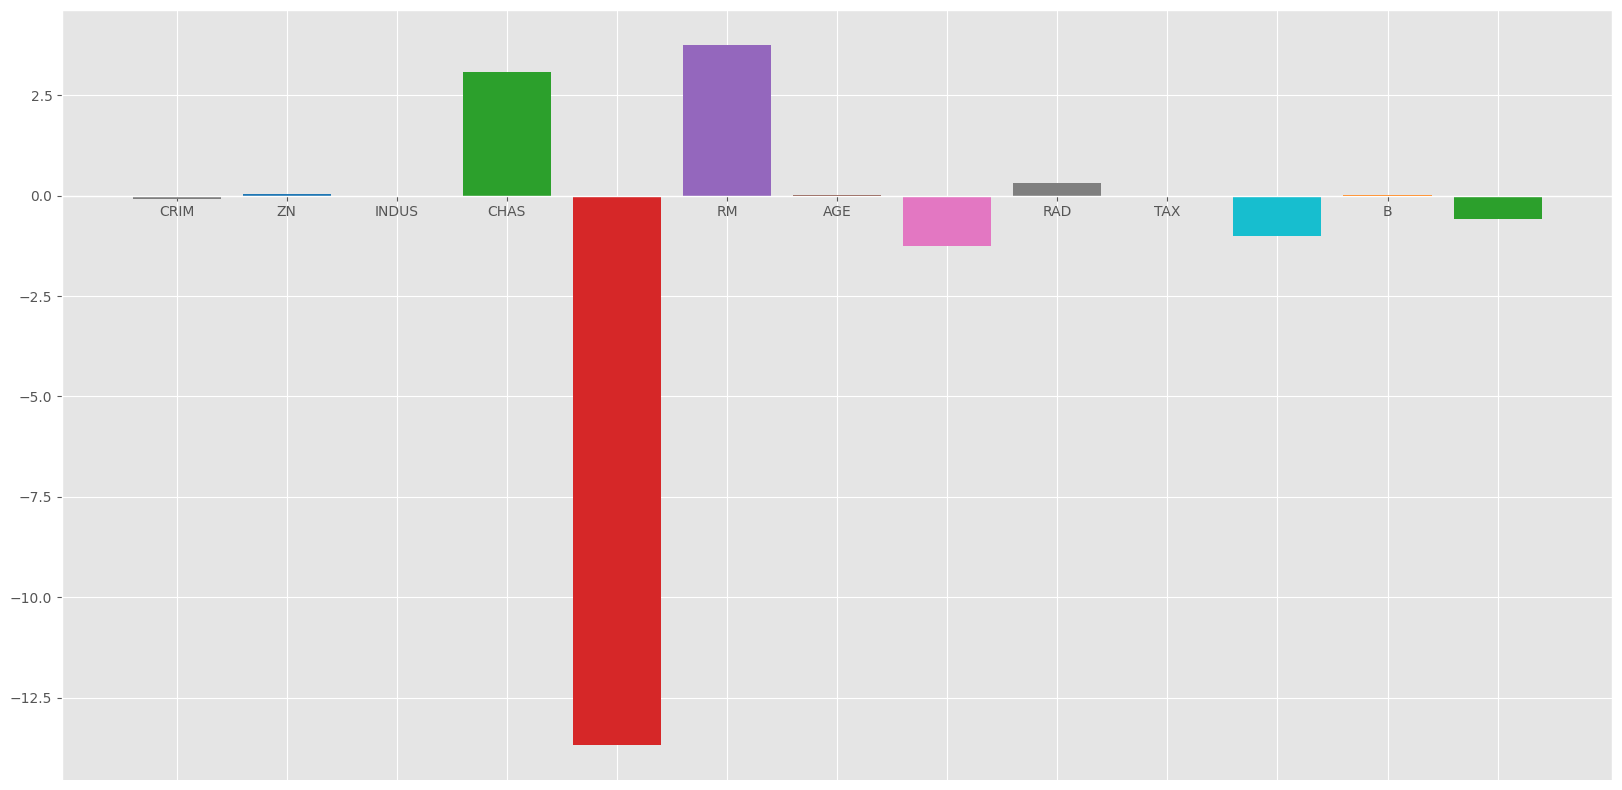

In [59]:
#plotting the coefficient score
fig,ax=plt.subplots(figsize=(20,10))
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
ax.bar(lreg_coefficient["Columns"],lreg_coefficient["Coefficient Estimate"],color=color)
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()



**Ridge Regression**

In [60]:
from sklearn.linear_model import Ridge
ridgeR=Ridge(alpha=1)
ridgeR.fit(X_train,y_train)
y_pred=ridgeR.predict(X_test)
mean_squared_error_ridge=np.mean((y_pred-y_test)**2)
print(mean_squared_error_ridge)


36.212421618945044


In [66]:

# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train, y_train)
y_pred = ridgeR.predict(X_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= X_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

36.212421618945044
    Columns  Coefficient Estimate
0      CRIM             -0.075199
1        ZN              0.048224
2     INDUS             -0.032748
3      CHAS              2.886777
4       NOX             -7.224484
5        RM              3.791603
6       AGE              0.007074
7       DIS             -1.155054
8       RAD              0.313365
9       TAX             -0.016328
10  PTRATIO             -0.931227
11        B              0.008527
12    LSTAT             -0.594676


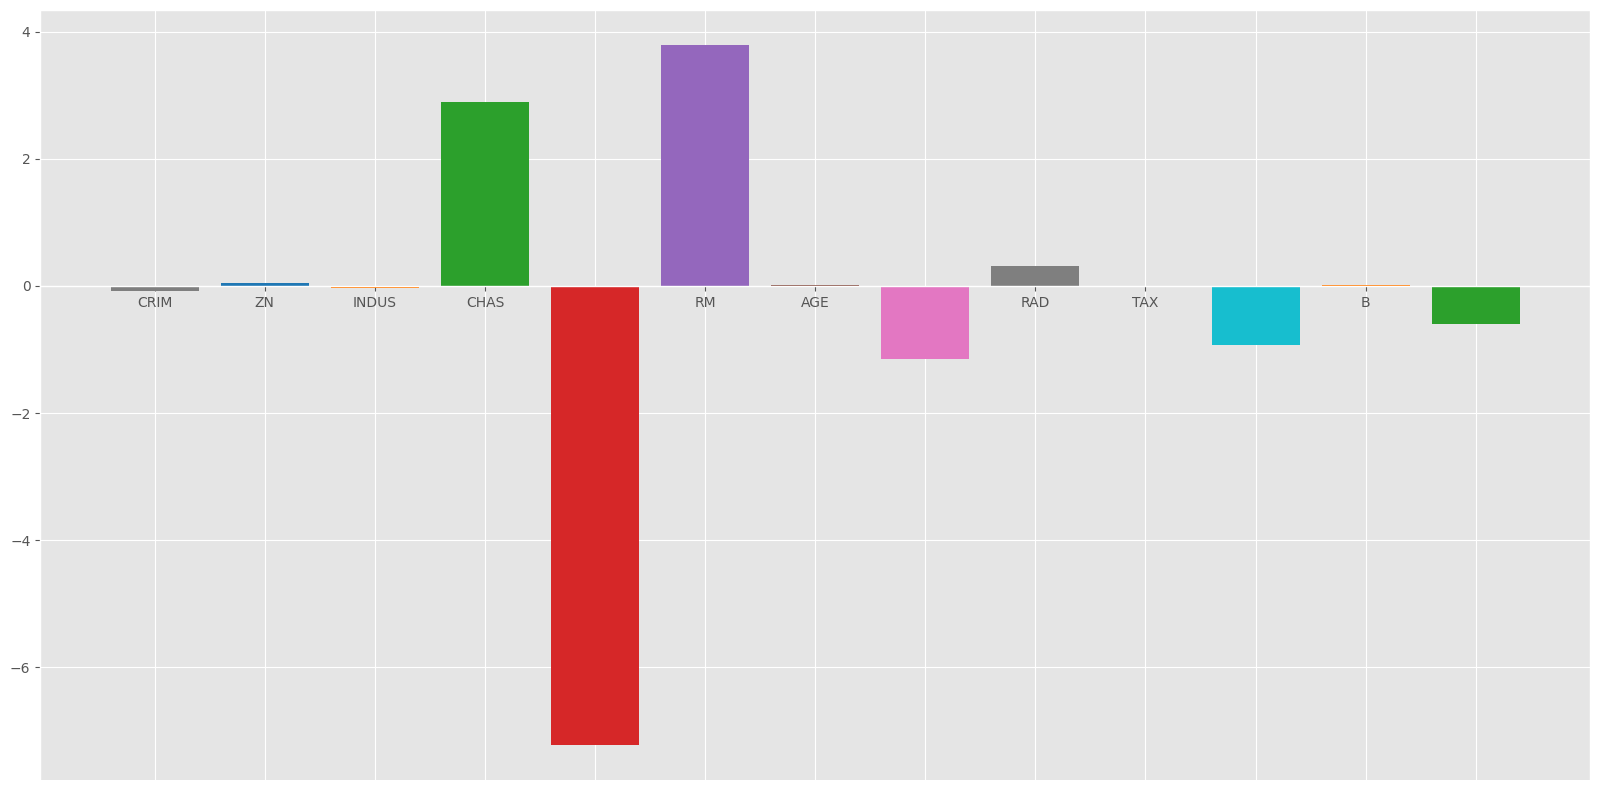

In [67]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [69]:
#Lesso regression
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred1=lasso.predict(X_test)
mean_squared_error_lesso=np.mean((y_pred1-y_test)**2)
print(mean_squared_error_lesso)

40.250573916478054


In [71]:
lasso_coeff=pd.DataFrame()
lasso_coeff["Columns"]=X_train.columns
lasso_coeff["Coefficient Estimate"]=pd.Series(lasso.coef_)
print(lasso_coeff)

    Columns  Coefficient Estimate
0      CRIM             -0.038598
1        ZN              0.047852
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.026812
6       AGE              0.036246
7       DIS             -0.535147
8       RAD              0.309730
9       TAX             -0.018641
10  PTRATIO             -0.845535
11        B              0.007966
12    LSTAT             -0.809596
